## Feature Evaluation - Clustering & Embedding

### Import Libraries

In [1]:
import os
import PIL
import pandas as pd 
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import ImageFile
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

ImageFile.LOAD_TRUNCATED_IMAGES = True
%load_ext autotime

### 50K sample _ Feature

In [2]:
features_df = pd.read_csv('./Results/features_50k.csv')
features_df = features_df.rename(columns={"Unnamed: 0": "product_id"}, errors="raise")
features_df.set_index('product_id',inplace=True)

time: 4.77 s


In [3]:
features_df.shape

(4249, 4096)

time: 4.73 ms


### PCA (n_components=2)

In [4]:
# PCA for two dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features_df)

time: 789 ms


In [5]:
# convert to dataframe
X_pca_df = pd.DataFrame(X_pca, columns=['pca_one','pca_two'])

time: 1.17 ms


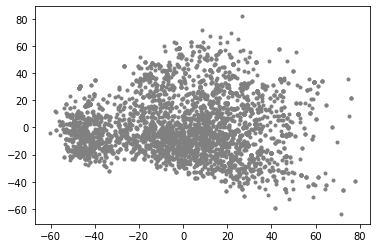

time: 173 ms


In [6]:
plt.figure(figsize=(6,4))
plt.scatter(X_pca[:,0], X_pca[:,1],color='grey',marker='.')
plt.show()

### Display images

In [7]:
def getImage(path):
    image = PIL.Image.open(path)
#     image.thumbnail(size,Image.ANTIALIAS)
    image = np.array(image)
    return OffsetImage(image,zoom=0.05)

time: 992 µs


In [8]:
products = list(np.unique(features_df.index))
imagePaths = []
for item in products:
    dir_name = './Images_50K/'
    image_path = os.path.join(dir_name, item + ".jpg" )
    imagePaths.append(image_path)

time: 12.1 ms


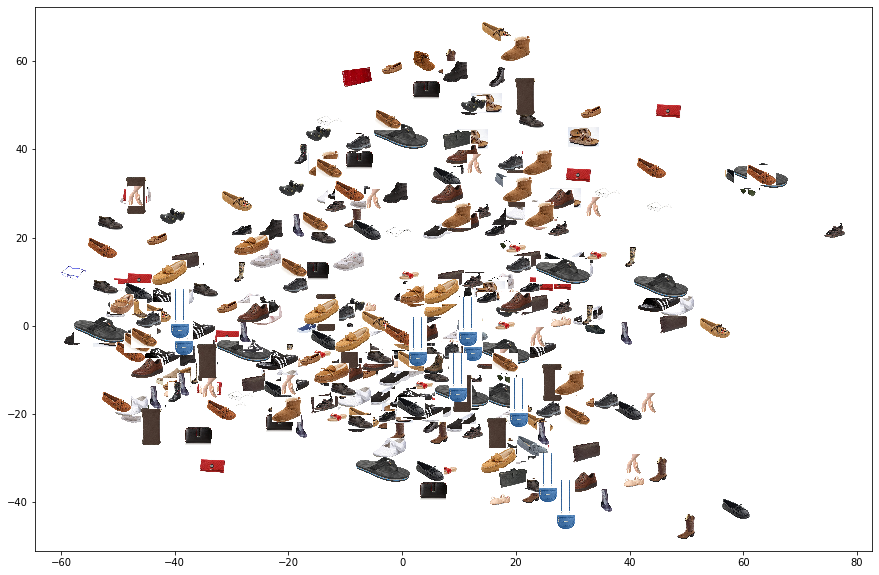

time: 7.71 s


In [9]:
x = X_pca[:400,0]
y = X_pca[:400,1]

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y) 

for x_, y_, path in zip(x, y,imagePaths[:400]):
    ab = AnnotationBbox(getImage(path), (x_, y_), frameon=False)
    ax.add_artist(ab)

## Kmeans

### Find optimal cluster value of Kmeans

In [10]:
# MinMasScaler 
mms = MinMaxScaler()
mms.fit(features_df)
feature_transformed = mms.transform(features_df)


time: 818 ms


In [121]:
# Calculate sum of squared distances.
Sum_of_squared_distances = []
K = range(1,50)
for k in K:
    km = KMeans(n_clusters=k,ramdom_state=0)
    km = km.fit(feature_transformed)
    Sum_of_squared_distances.append(km.inertia_)

time: 1.04 ms


In [11]:
Sum_of_squared_distances = [240543.16804074164,\
 224958.60989984687,\
 214408.07107488145,\
 206692.01271805147,\
 200691.16360630858,\
 195226.03928096523,\
 191905.50147818148,\
 188603.87832643365,\
 185535.5428921438,\
 183125.5649563384,\
 180878.88414383653,\
 179242.12660351442,\
 178485.85310640407,\
 176311.86992846322,\
 175897.49081790287,\
 174427.36405767917,\
 173144.20746262165,\
 172275.40060803032,\
 171387.08647908227,\
 170491.5115712795,\
 169244.58639195387,\
 168617.93594757878,\
 167318.0415327299,\
 166640.26702685477,\
 166292.2757572806,\
 165483.39214064396,\
 165014.96270989586,\
 163977.12707516516,\
 163631.6428769067,\
 162575.5230354454,\
 162279.46926969656,\
 161725.99832536376,\
 161445.01577937682,\
 160538.24934998582,\
 160141.11516977113,\
 159756.95518808506,\
 158594.89216803515,\
 158156.18094875163,\
 157730.33645802172,\
 156720.23813052426,\
 156505.19905075306,\
 156272.6940155653,\
 156156.67401079976,\
 155988.83487164814,\
 154876.4709966111,\
 154380.29302032472,\
 153497.1609761652,\
 153512.63194549605,\
 153269.87950952194]

time: 2.37 ms


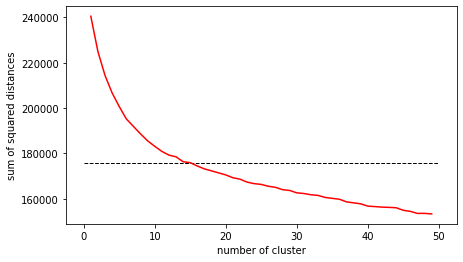

time: 152 ms


In [13]:
K=list(range(1,50))
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(K, Sum_of_squared_distances,'r-')
ax.hlines(y=Sum_of_squared_distances[14], xmin= 0, xmax=50, linestyle='--',linewidth=1, color='black')
plt.xlabel('number of cluster')
plt.ylabel('sum of squared distances')
plt.show()

### Number of clusters = 15

In [127]:
# MinMasScaler 
mms = MinMaxScaler()
mms.fit(features_df)
feature_transformed = mms.transform(features_df)

time: 416 ms


In [14]:
# Kmeans
km = KMeans(n_clusters=15, random_state=0)
km = km.fit(feature_transformed)

time: 26.8 s


In [15]:
# Kmeans Prediction
y = km.labels_

time: 2.61 ms


In [16]:
# Check products in each cluster
(unique, counts) = np.unique(y, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[  0 166]
 [  1 214]
 [  2 332]
 [  3 223]
 [  4 264]
 [  5 317]
 [  6 302]
 [  7 302]
 [  8 239]
 [  9 122]
 [ 10 489]
 [ 11 435]
 [ 12 264]
 [ 13 299]
 [ 14 281]]
time: 4.91 ms


In [17]:
# add clustering label to PCA dataframe
X_pca_df['label'] = y
X_pca_df.head()

,pca_one,pca_two,label
0,5.494735,-37.450855,11
1,4.179410,53.422764,7
2,-30.947861,-4.561140,13
3,-7.576792,37.579672,5
4,-21.711760,-22.044072,13


time: 29.1 ms


### Two-dimensional projection highlighting the shoes that belong to each of the 20 clusters.

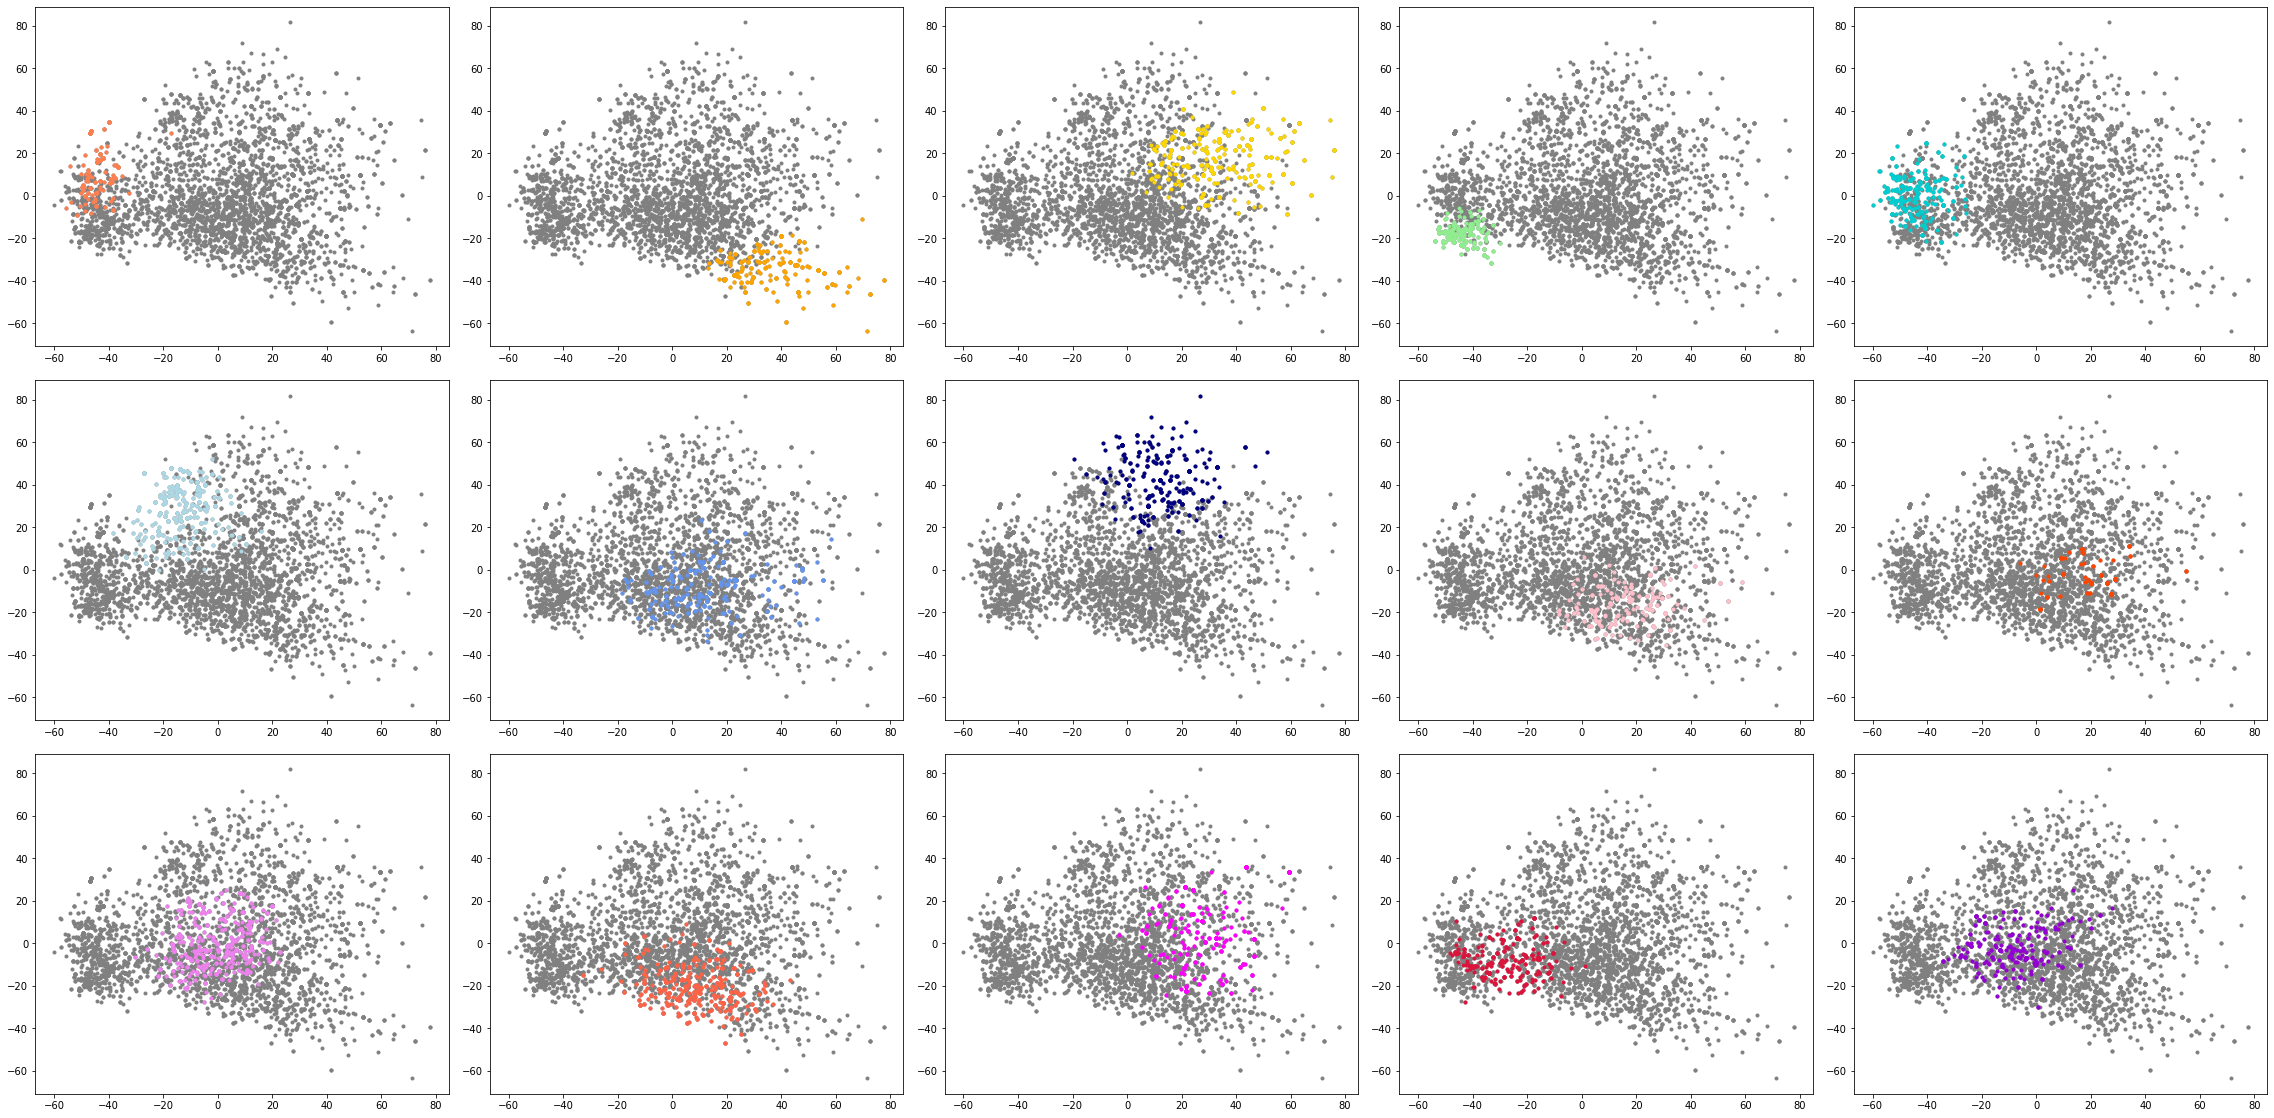

time: 2.57 s


In [18]:
fig = plt.figure(figsize=(40,20))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
# list of color names: https://matplotlib.org/3.1.0/gallery/color/named_colors.html
colors = ['coral','orange','gold','lightgreen','darkturquoise',
          'lightblue','cornflowerblue','navy','pink','orangered',
          'violet','tomato','fuchsia','crimson','darkviolet']


# Plot each cluster with different color 
for i in range(15):
    
    label_df = X_pca_df.loc[X_pca_df['label'] == i]
    
    ax = fig.add_subplot(3, 5, i+1)
    ax.scatter(X_pca_df['pca_one'],X_pca_df['pca_two'], c='gray',marker='.')
    ax.scatter(label_df['pca_one'],label_df['pca_two'], c=colors[i],marker='.')
    

In [19]:
# X_pca_center = pca.transform(km.cluster_centers_)
# plt.figure(figsize=(40,30))
# plt.scatter(X_pca[:,0],X_pca[:,1], c=y, cmap='rainbow')
# plt.scatter(X_pca_center[:,0] ,X_pca_center[:,1], color='black')
# plt.show()

time: 771 µs


### PCA (n_components=3)

In [20]:
pca = PCA(n_components=3)
X_pca_3 = pca.fit_transform(features_df)
x = X_pca_3[:,0]
y = X_pca_3[:,1] 
z = X_pca_3[:,2]

time: 832 ms


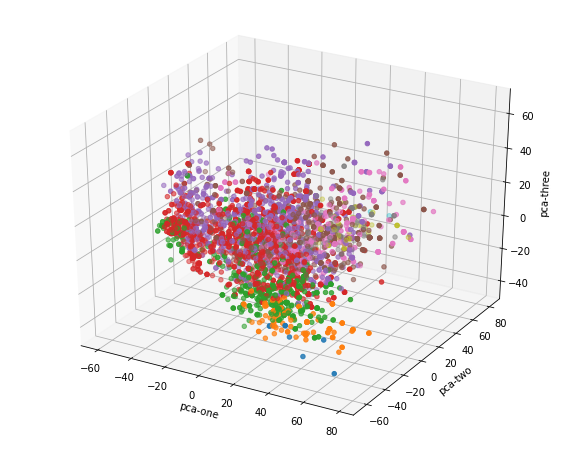

time: 246 ms


In [21]:
ax = plt.figure(figsize=(10,8)).gca(projection='3d')
ax.scatter(
    xs=x, 
    ys=y, 
    zs=z, 
    c=y, 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()